# Regression tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# I'll try it with the complete data first
data = pd.read_csv('Data/data 258.csv')
#features = ['diverse_ind','annual_cost','avg_award','pct_awarded','GRNRALT_rate','TUITION2', 'CHG5AY2']
#features_std = ['GRNRALT_rate_std','TUITION2_std','diverse_ind_std','avg_award_std','pct_awarded_std']
features = ['GRNRALT_rate','TUITION2','diverse_ind','avg_award','pct_awarded']

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(951)
train, test = train_test_split(data, test_size = 0.2)

In [4]:
from sklearn.tree import DecisionTreeRegressor
transformed_tree = DecisionTreeRegressor(random_state=951)
result2 = transformed_tree.fit(X = train[features], y = train.logit)

In [5]:
def reverse_logit(logit):
    return np.exp(logit)/(1 + np.exp(logit))

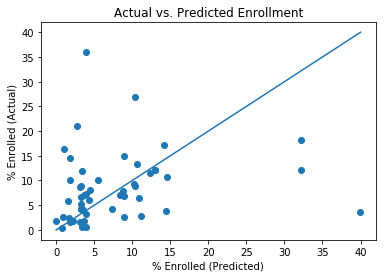

In [6]:
y_pred_logit = result2.predict(X = test[features])
y_pred = reverse_logit(y_pred_logit)
plt.scatter(y_pred*100, test.intl_pct)
plt.title('Actual vs. Predicted Enrollment')
plt.xlabel('% Enrolled (Predicted)')
plt.ylabel('% Enrolled (Actual)')
plt.plot([0,40],[0,40])

In [7]:
# mean absolute error
np.mean(np.abs(y_pred*100 -test.intl_pct)) # 5.69%

5.687408495206953

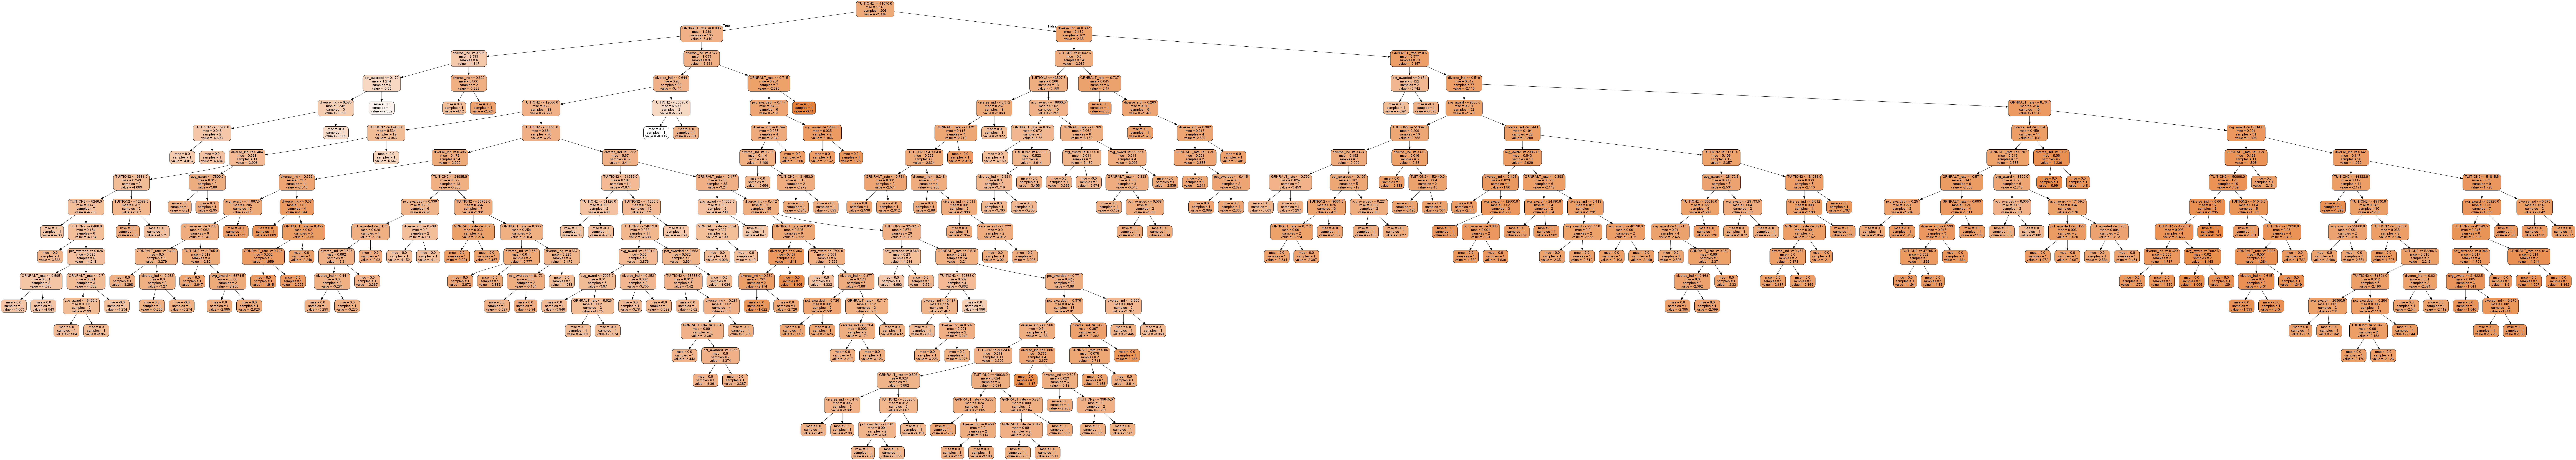

In [14]:
# visualize
from sklearn.tree import export_graphviz
from IPython.display import Image 
from subprocess import call

export_graphviz(transformed_tree, out_file='tree.dot', feature_names = features,
                filled=True, rounded=True)
# Convert to png using system command (requires Graphviz)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

Image(filename = 'tree.png')

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'



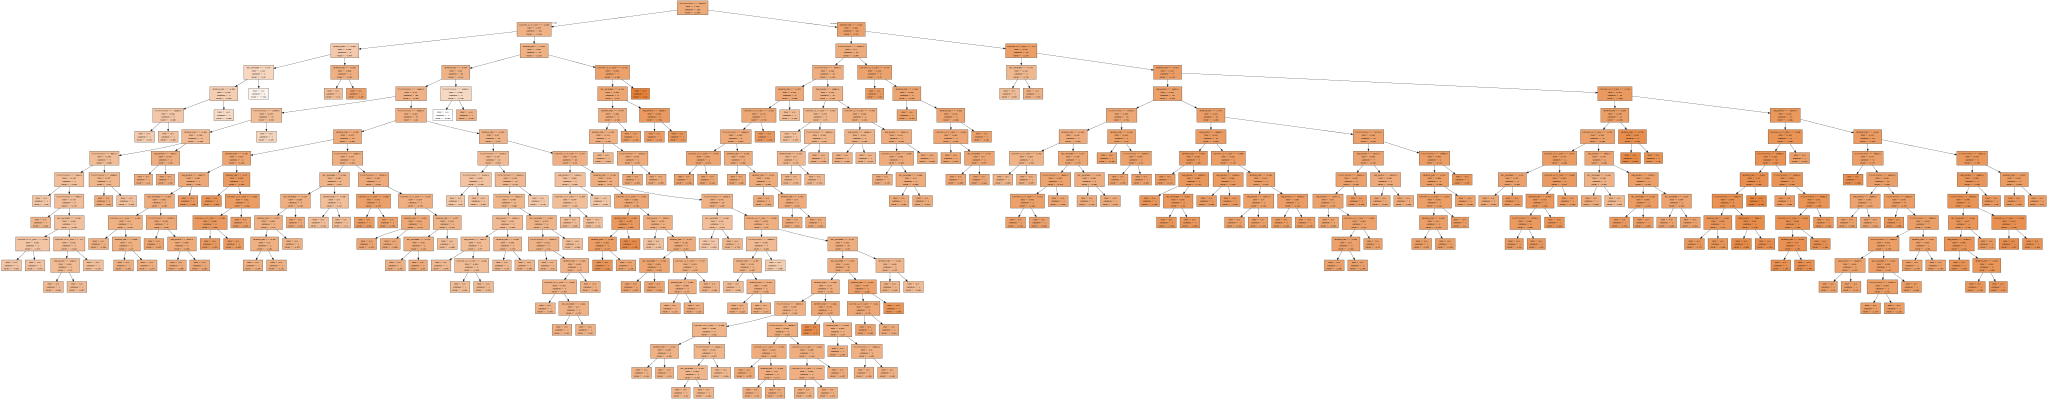

In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(transformed_tree, out_file=None
   , feature_names=features
   , filled = True))
display(SVG(graph.pipe(format='svg')))